In [277]:
#imports

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


## 1. Analyse exploratoire et nettoyage
Charger les données, vérifier les types, corriger TotalCharges, traiter les valeurs manquantes.
Visualiser la distribution des variables et la cible.
Comprendre la structure des variables catégorielles et numériques.

In [278]:
#Config lisibilité des graphiques
plt.style.use('default')
sns.set_palette("husl")

In [279]:
#Chargement des données
df = pd.read_csv("../data/Customers.csv")

In [280]:
print("Dimensions du dataset:", df.shape)
print("\nAperçu des premières lignes:")
display(df.head())
print("\nInformations sur les colonnes:")
display(df.info())

Dimensions du dataset: (7043, 21)

Aperçu des premières lignes:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

None

In [281]:
#Distribution de la variable cible
print("\nDistribution de la variable Churn:")
print(df['Churn'].value_counts(normalize=True).round(3))


Distribution de la variable Churn:
Churn
No     0.735
Yes    0.265
Name: proportion, dtype: float64


In [282]:
#1. Conversion de TotalCharges en numérique
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())

Valeurs manquantes par colonne:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [283]:
#2. Analyse des variables numériques
numeric_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']
print("\nStatistiques descriptives des variables numériques:")
print(df[numeric_cols].describe())


Statistiques descriptives des variables numériques:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


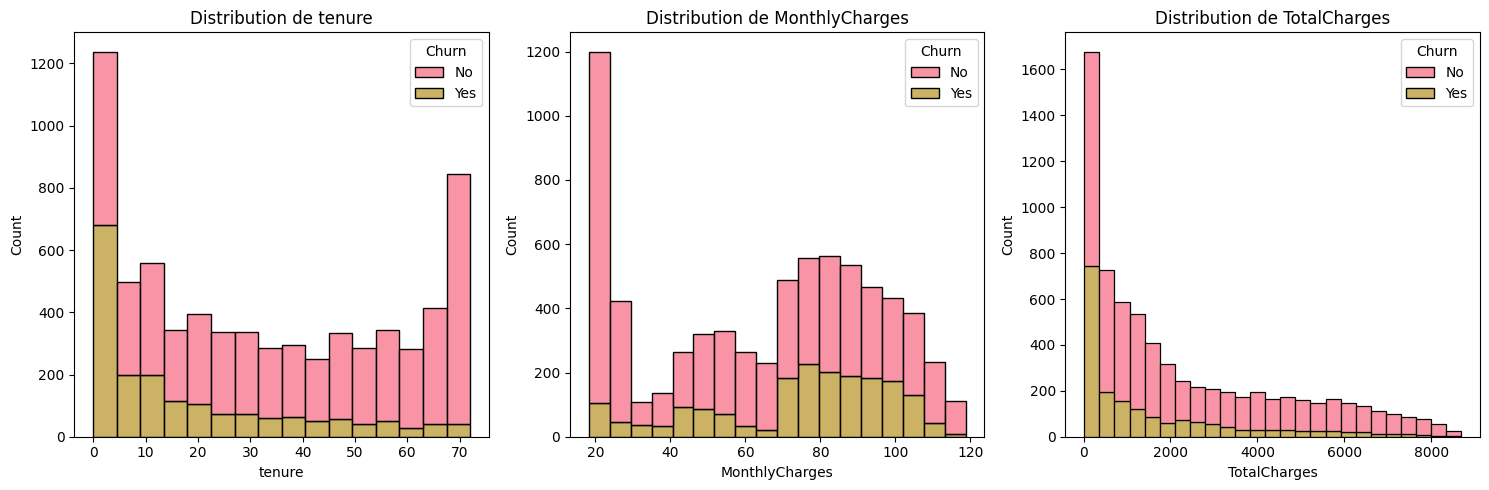

In [284]:
#3. Visualisation de la distribution des variables numériques

plt.figure(figsize=(15,5))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(1,3,i)
    sns.histplot(data=df, x=col, hue='Churn', multiple="stack")
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

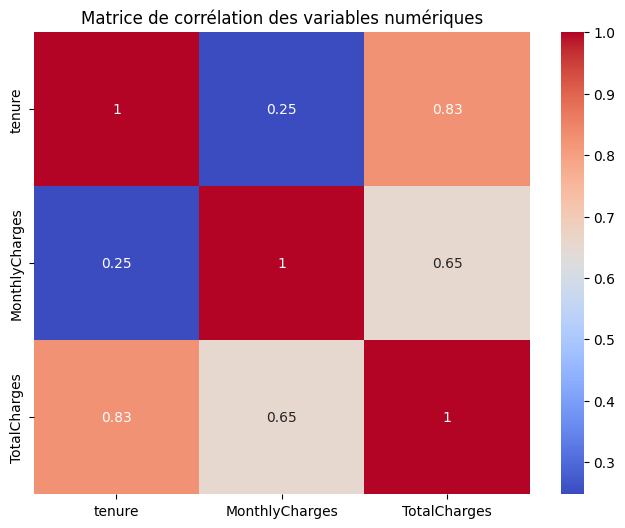

In [285]:
#4. Corrélation entre variables numériques

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

In [286]:
#1. Traitement des valeurs manquantes de TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [287]:
#2. Analyse des variables catégorielles 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID') #On ignore l'ID client

print("Distribution des variables catégorielles:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True).round(3))

Distribution des variables catégorielles:

gender:
gender
Male      0.505
Female    0.495
Name: proportion, dtype: float64

Partner:
Partner
No     0.517
Yes    0.483
Name: proportion, dtype: float64

Dependents:
Dependents
No     0.7
Yes    0.3
Name: proportion, dtype: float64

PhoneService:
PhoneService
Yes    0.903
No     0.097
Name: proportion, dtype: float64

MultipleLines:
MultipleLines
No                  0.481
Yes                 0.422
No phone service    0.097
Name: proportion, dtype: float64

InternetService:
InternetService
Fiber optic    0.440
DSL            0.344
No             0.217
Name: proportion, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     0.497
Yes                    0.287
No internet service    0.217
Name: proportion, dtype: float64

OnlineBackup:
OnlineBackup
No                     0.438
Yes                    0.345
No internet service    0.217
Name: proportion, dtype: float64

DeviceProtection:
DeviceProtection
No                     0.43

([0, 1, 2],
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

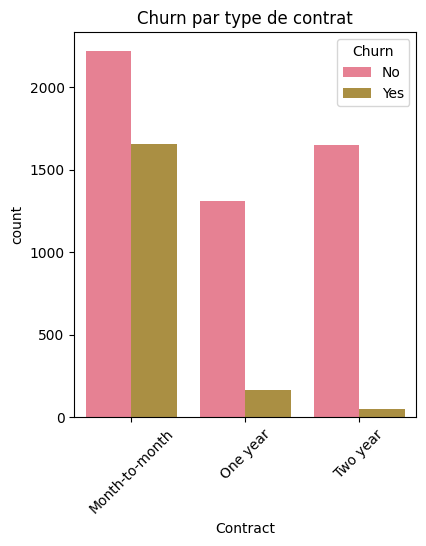

In [288]:
#3. Visualisation des variables catégorielles les plus importantes
plt.figure(figsize=(15,5))

#Contract vs Churn
plt.subplot(1,3,1)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn par type de contrat')
plt.xticks(rotation=45)

([0, 1, 2], [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'No')])

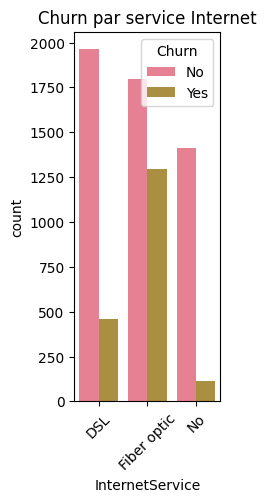

In [289]:
#InternetService vs Churn
plt.subplot(1,3,2)
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn par service Internet')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

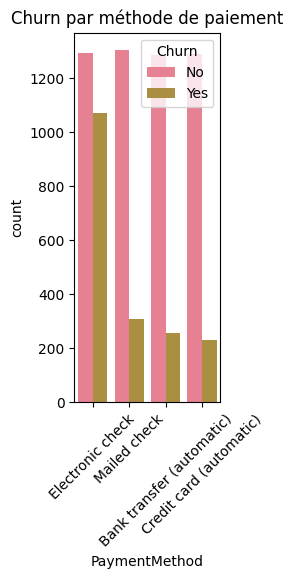

In [290]:
#PaymentMethod vs Churn
plt.subplot(1,3,3)
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn par méthode de paiement')
plt.xticks(rotation=45)


In [291]:
# 4. Vérification des valeurs uniques pour chaque variable catégorielle
print("\nNombre de valeurs uniques par variable catégorielle:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} valeurs uniques")


Nombre de valeurs uniques par variable catégorielle:
gender: 2 valeurs uniques
Partner: 2 valeurs uniques
Dependents: 2 valeurs uniques
PhoneService: 2 valeurs uniques
MultipleLines: 3 valeurs uniques
InternetService: 3 valeurs uniques
OnlineSecurity: 3 valeurs uniques
OnlineBackup: 3 valeurs uniques
DeviceProtection: 3 valeurs uniques
TechSupport: 3 valeurs uniques
StreamingTV: 3 valeurs uniques
StreamingMovies: 3 valeurs uniques
Contract: 3 valeurs uniques
PaperlessBilling: 2 valeurs uniques
PaymentMethod: 4 valeurs uniques
Churn: 2 valeurs uniques


## Prétraitement et split
L’étape suivante consiste à préparer les données pour l’entraînement du modèle.
Cela inclut :

    Séparer les features (X) et la cible (y)
    Définir les colonnes numériques et catégorielles
    Créer un pipeline de prétraitement (encodage + standardisation)
    Splitter les données en train/val/test de façon stratifiée

In [292]:
#1. Séparation features/target
y= (df['Churn'] == 'Yes').astype(int) #conversion en 0/1
X= df.drop(['Churn', 'customerID'], axis=1)

In [293]:
#2. Définition des colonnes
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [294]:
#Création du préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False),
         categorical_features)
    ]
)

In [295]:
#4. Split des données (train/val/test stratifié)
X_temp, X_test, y_temp, y_test=train_test_split(
    X,y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val= train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

In [296]:
#5. Fit/transform sur train, transform sur val/test

X_train_prep= preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)

print("Shapes après prétraitement :")
print("Train :", X_train_prep.shape)
print("Val   :", X_val_prep.shape)
print("Test  :", X_test_prep.shape)

Shapes après prétraitement :
Train : (4507, 29)
Val   : (1127, 29)
Test  : (1409, 29)


In [297]:
# Enregistrer le DataFrame prétraité dans un fichier CSV
df.to_csv("../data/Customers_cleaned.csv", index=False)

In [298]:
from IPython.display import display, HTML

# Récupérer un exemple de client du DataFrame original
example_client = df.iloc[0].copy()  # Premier client comme exemple
client_id = example_client['customerID']

# Récupérer les noms des colonnes après encodage
ohe = preprocessor.named_transformers_['cat']
cat_cols_encoded = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, cat_cols_encoded])

# Récupérer les valeurs encodées pour cet exemple
# On prend le premier client du jeu d'entraînement pour l'exemple
example_encoded = X_train_prep[0]

# Créer un dictionnaire pour stocker les valeurs encodées
encoded_values = {}
for i, feature in enumerate(all_feature_names):
    encoded_values[feature] = example_encoded[i]

# Créer le tableau HTML
html_table = f"""
<div style="background-color: #222; color: #fff; padding: 20px; border-radius: 10px;">
    <h3 style="color: #fff;">Tableau d'encodage détaillé pour le client {client_id}</h3>
    <table border="1" style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif; font-size: 14px; color: #fff;">
      <thead style="background-color: #4a4a4a; color: white; font-weight: bold; text-align: center;">
        <tr>
          <th style="padding: 8px;">Variable originale</th>
          <th style="padding: 8px;">Type original</th>
          <th style="padding: 8px;">Valeur originale</th>
          <th style="padding: 8px;">Traitement</th>
          <th style="padding: 8px;">Colonne encodée</th>
          <th style="padding: 8px;">Type encodé</th>
          <th style="padding: 8px;">Valeur encodée</th>
        </tr>
      </thead>
      <tbody>
"""

# Définir les couleurs pour les types
colors = {
    "Identifiant": "#FFF9C4;color:#333333",  # Jaune très pâle avec texte foncé
    "Catégorielle": "#FFCDD2;color:#333333", # Rouge pâle avec texte foncé
    "Binaire": "#C8E6C9;color:#333333",      # Vert pâle avec texte foncé
    "Numérique": "#BBDEFB;color:#333333",    # Bleu pâle avec texte foncé
    "Numérique binaire": "#C8E6C9;color:#333333" # Vert pâle avec texte foncé
}

# Ajouter l'ID client
row_style = "background-color: #333; color: #fff;"
html_table += f"""
    <tr style='{row_style}'>
      <td style='padding: 8px; text-align: left;'>customerID</td>
      <td style='padding: 8px; text-align: left; background-color: {colors["Identifiant"].split(';')[0]}; {colors["Identifiant"].split(';')[1]};'>Identifiant</td>
      <td style='padding: 8px; text-align: left;'>{client_id}</td>
      <td style='padding: 8px; text-align: left;'>Non utilisé</td>
      <td style='padding: 8px; text-align: left;'>-</td>
      <td style='padding: 8px; text-align: left;'>-</td>
      <td style='padding: 8px; text-align: center; font-weight: bold;'>-</td>
    </tr>
"""

# Ajouter les variables numériques
for i, col in enumerate(numeric_features):
    row_style = "background-color: #444; color: #fff;" if i % 2 == 0 else "background-color: #555; color: #fff;"
    orig_value = example_client[col]
    enc_value = encoded_values[col]
    html_table += f"""
    <tr style='{row_style}'>
      <td style='padding: 8px; text-align: left;'>{col}</td>
      <td style='padding: 8px; text-align: left; background-color: {colors["Numérique"].split(';')[0]}; {colors["Numérique"].split(';')[1]};'>Numérique</td>
      <td style='padding: 8px; text-align: left;'>{orig_value}</td>
      <td style='padding: 8px; text-align: left;'>Standardisation</td>
      <td style='padding: 8px; text-align: left;'>{col}</td>
      <td style='padding: 8px; text-align: left; background-color: {colors["Numérique"].split(';')[0]}; {colors["Numérique"].split(';')[1]};'>Numérique standardisé</td>
      <td style='padding: 8px; text-align: center; font-weight: bold;'>{enc_value:.4f}</td>
    </tr>
    """

# Ajouter les variables catégorielles
for i, col in enumerate(categorical_features):
    orig_value = example_client[col]

    # Trouver toutes les colonnes encodées pour cette variable
    related_cols = [c for c in cat_cols_encoded if c.startswith(col + '_')]

    for j, enc_col in enumerate(related_cols):
        row_style = "background-color: #444; color: #fff;" if (i + len(numeric_features)) % 2 == 0 else "background-color: #555; color: #fff;"

        # Déterminer si cette colonne encodée est active pour cet exemple
        is_active = encoded_values.get(enc_col, 0) == 1
        enc_value = encoded_values.get(enc_col, 0)

        # Extraire la valeur de la catégorie à partir du nom de la colonne
        category_value = enc_col.split('_', 1)[1] if '_' in enc_col else "Yes"

        html_table += f"""
        <tr style='{row_style}'>
          <td style='padding: 8px; text-align: left;'>{col}</td>
          <td style='padding: 8px; text-align: left; background-color: {colors["Catégorielle"].split(';')[0]}; {colors["Catégorielle"].split(';')[1]};'>Catégorielle</td>
          <td style='padding: 8px; text-align: left;'>{orig_value}</td>
          <td style='padding: 8px; text-align: left;'>One-Hot Encoding</td>
          <td style='padding: 8px; text-align: left;'>{enc_col}</td>
          <td style='padding: 8px; text-align: left; background-color: {colors["Binaire"].split(';')[0]}; {colors["Binaire"].split(';')[1]};'>Binaire</td>
          <td style='padding: 8px; text-align: center; font-weight: bold;'>{int(enc_value)}</td>
        </tr>
        """

# Ajouter la variable cible
row_style = "background-color: #333; color: #fff;"
html_table += f"""
    <tr style='{row_style}'>
      <td style='padding: 8px; text-align: left;'>Churn</td>
      <td style='padding: 8px; text-align: left; background-color: {colors["Binaire"].split(';')[0]}; {colors["Binaire"].split(';')[1]};'>Binaire</td>
      <td style='padding: 8px; text-align: left;'>{example_client['Churn']}</td>
      <td style='padding: 8px; text-align: left;'>Encodage binaire</td>
      <td style='padding: 8px; text-align: left;'>Churn</td>
      <td style='padding: 8px; text-align: left; background-color: {colors["Numérique binaire"].split(';')[0]}; {colors["Numérique binaire"].split(';')[1]};'>Numérique binaire</td>
      <td style='padding: 8px; text-align: center; font-weight: bold;'>{1 if example_client['Churn'] == 'Yes' else 0}</td>
    </tr>
"""

# Fermer la table et ajouter la légende
html_table += """
      </tbody>
    </table>
    <div style="margin-top: 20px;">
      <p style="font-weight: bold; margin-bottom: 10px; color: #fff;">Légende des types:</p>
      <div style="display: flex; flex-wrap: wrap; gap: 10px;">
        <div style="background-color: #FFF9C4; color: #333333; padding: 5px 10px; border-radius: 4px;">Identifiant</div>
        <div style="background-color: #FFCDD2; color: #333333; padding: 5px 10px; border-radius: 4px;">Catégorielle</div>
        <div style="background-color: #C8E6C9; color: #333333; padding: 5px 10px; border-radius: 4px;">Binaire</div>
        <div style="background-color: #BBDEFB; color: #333333; padding: 5px 10px; border-radius: 4px;">Numérique</div>
      </div>
    </div>

    <div style="margin-top: 20px;">
      <p style="font-weight: bold; margin-bottom: 10px; color: #fff;">Résumé:</p>
      <ul style="list-style-type: disc; padding-left: 20px; color: #fff;">
        <li>Variables originales: 21</li>
        <li>Variables après encodage: """ + str(len(all_feature_names)) + """</li>
        <li>Variables numériques: """ + str(len(numeric_features)) + """</li>
        <li>Variables binaires: """ + str(len(cat_cols_encoded)) + """</li>
      </ul>
    </div>
</div>
"""

# Afficher le tableau HTML
display(HTML(html_table))

Variable originale,Type original,Valeur originale,Traitement,Colonne encodée,Type encodé,Valeur encodée
customerID,Identifiant,7590-VHVEG,Non utilisé,-,-,-
tenure,Numérique,1,Standardisation,tenure,Numérique standardisé,-0.2554
MonthlyCharges,Numérique,29.85,Standardisation,MonthlyCharges,Numérique standardisé,-0.1748
TotalCharges,Numérique,29.85,Standardisation,TotalCharges,Numérique standardisé,-0.3421
gender,Catégorielle,Female,One-Hot Encoding,gender_Male,Binaire,1
Partner,Catégorielle,Yes,One-Hot Encoding,Partner_Yes,Binaire,0
Dependents,Catégorielle,No,One-Hot Encoding,Dependents_Yes,Binaire,0
PhoneService,Catégorielle,No,One-Hot Encoding,PhoneService_Yes,Binaire,1
MultipleLines,Catégorielle,No phone service,One-Hot Encoding,MultipleLines_No phone service,Binaire,0
MultipleLines,Catégorielle,No phone service,One-Hot Encoding,MultipleLines_Yes,Binaire,0
